In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity, show_hyperparams, vc_dimension_check
from sklearn.linear_model import LogisticRegression
import numpy as np

### Initalize Model

In [2]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

LogisticRegression(multi_class='multinomial')

### Hyperparameters

In [3]:
show_hyperparams(clf)

C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,multinomial
n_jobs,None
penalty,l2
random_state,None


### VC Dimension

In [4]:
vc_dimension_check(clf, x_data_d)

There is hope that the model will generalize well. VC Bound is satisfied.


### Recursive Feature Elimination

Features to keep ['Age' 'Height' 'Weight' 'Veg_Consump']


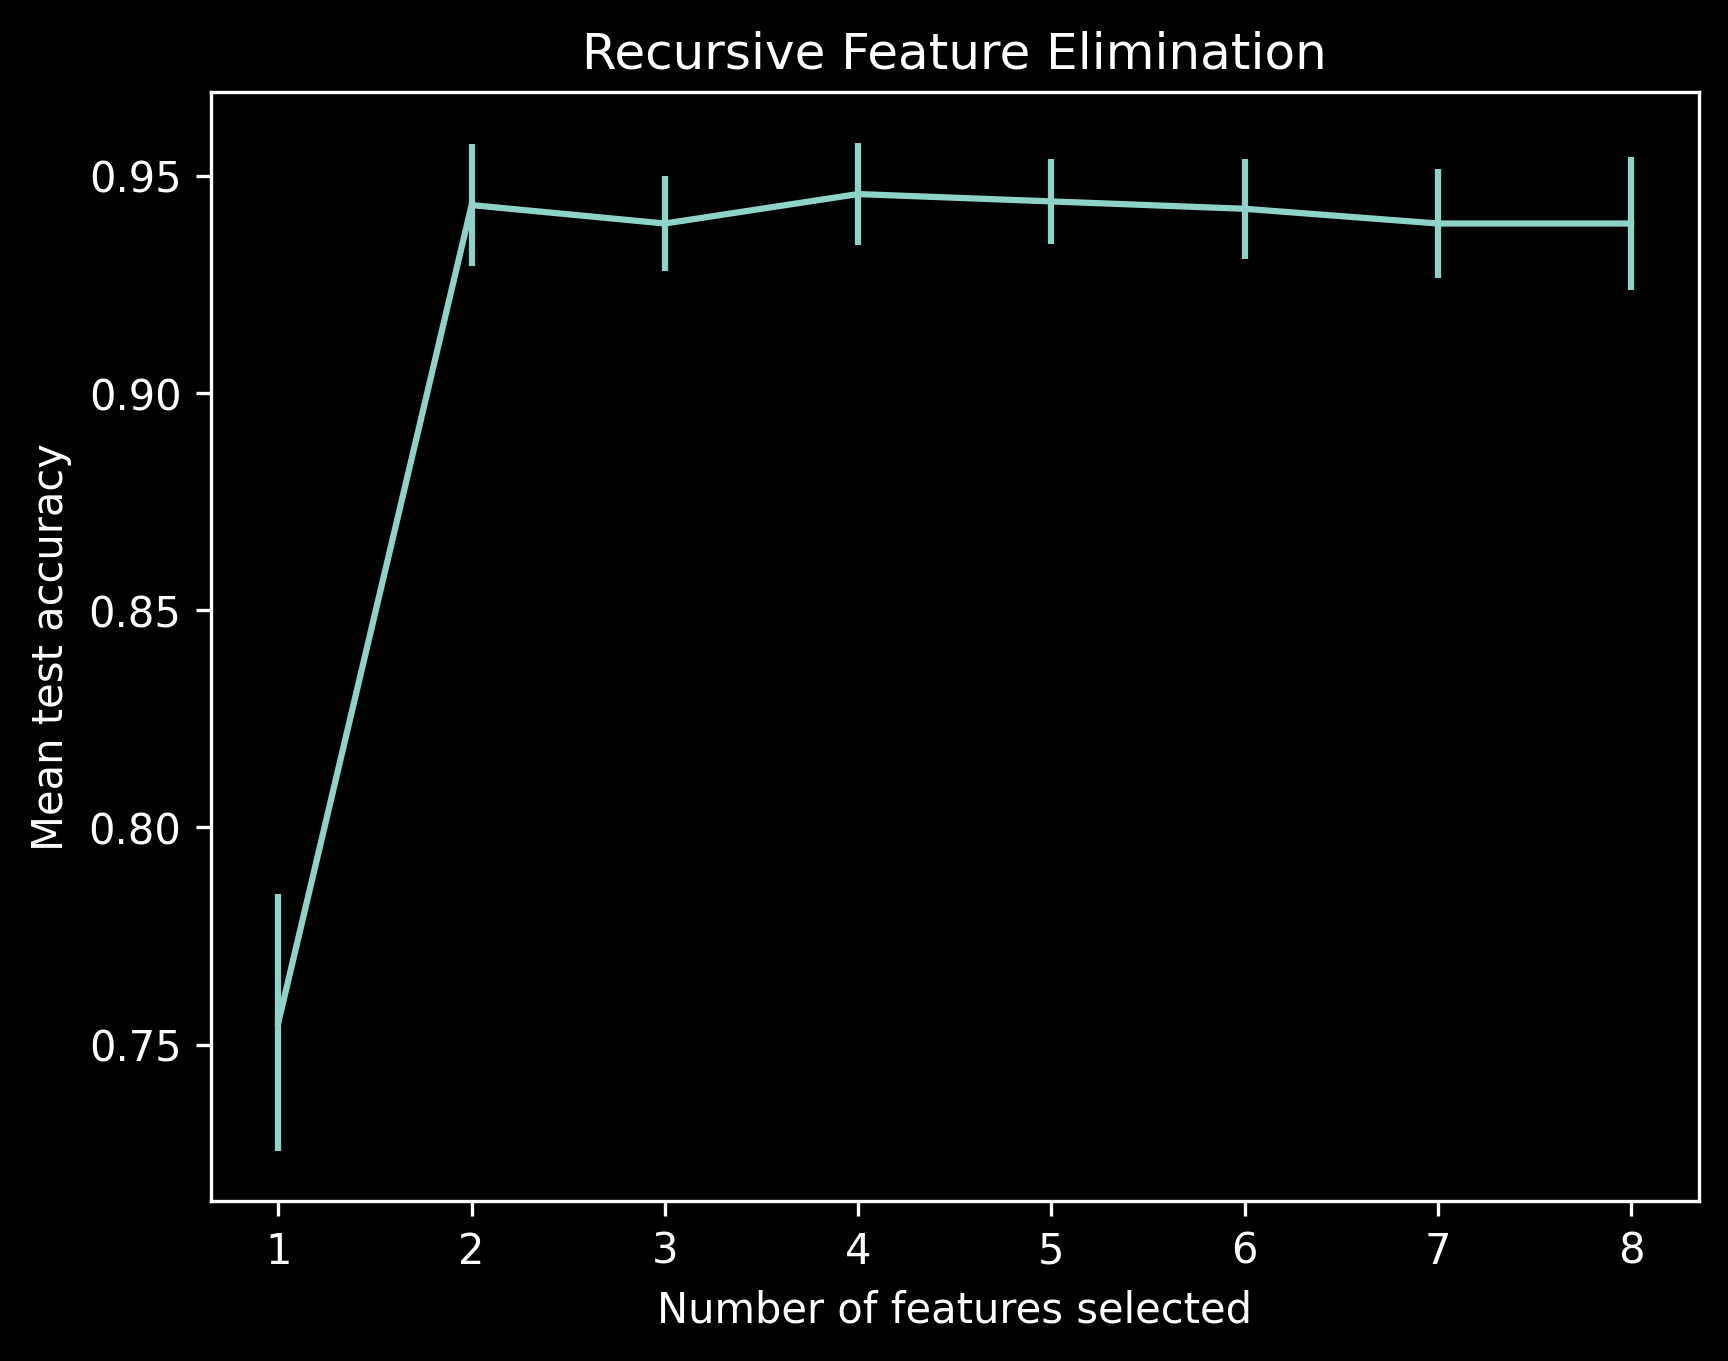

In [5]:
recursive_feature_elimination(clf, min_feats=1, cv=5, x_data_d=x_data_d, y_data_d=y_data_d)

### Test Log-Linearity

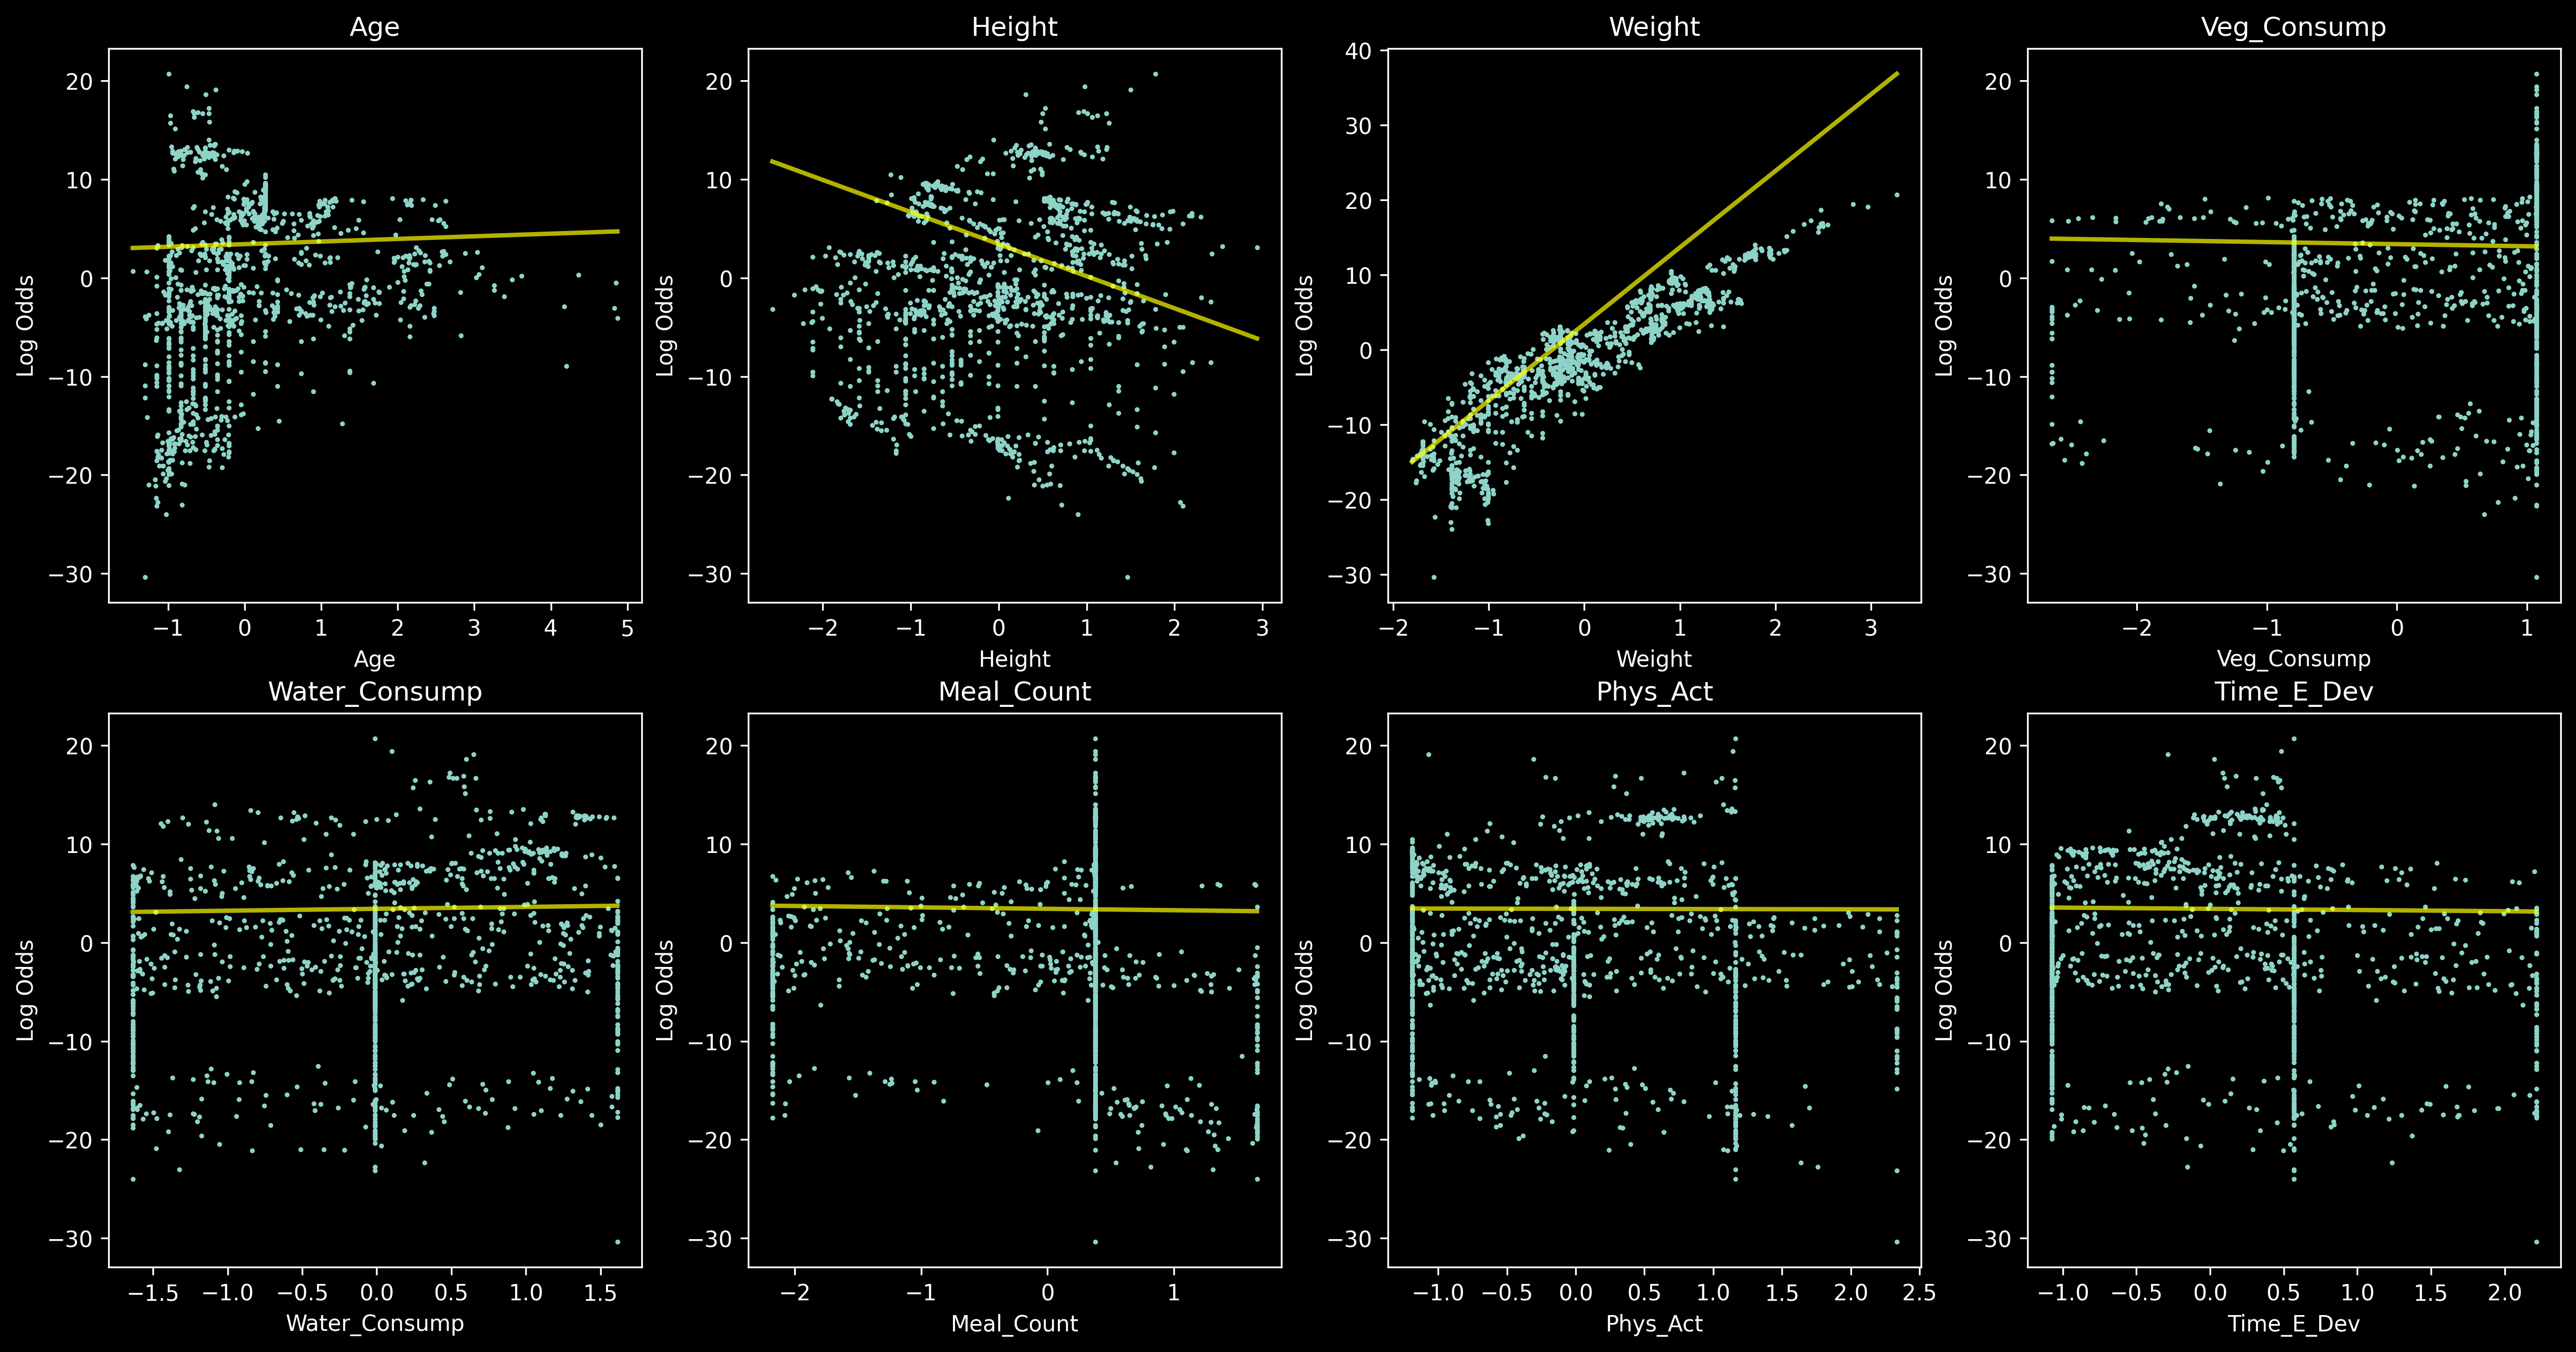

In [6]:
test_log_linearity(clf, class_index=3, x_data_d=x_data_d, y_data_d=y_data_d)